Saving indian_food (2).csv to indian_food (2) (2).csv
Dataset Preview:
             name                                        ingredients  \
0      Balu shahi                    Maida flour, yogurt, oil, sugar   
1          Boondi                            Gram flour, ghee, sugar   
2  Gajar ka halwa       Carrots, milk, sugar, ghee, cashews, raisins   
3          Ghevar  Flour, ghee, kewra, milk, clarified butter, su...   
4     Gulab jamun  Milk powder, plain flour, baking powder, ghee,...   

         diet  prep_time  cook_time flavor_profile   course        state  \
0  vegetarian         45         25          sweet  dessert  West Bengal   
1  vegetarian         80         30          sweet  dessert    Rajasthan   
2  vegetarian         15         60          sweet  dessert       Punjab   
3  vegetarian         15         30          sweet  dessert    Rajasthan   
4  vegetarian         15         40          sweet  dessert  West Bengal   

  region  
0   East  
1   West  
2  Nor

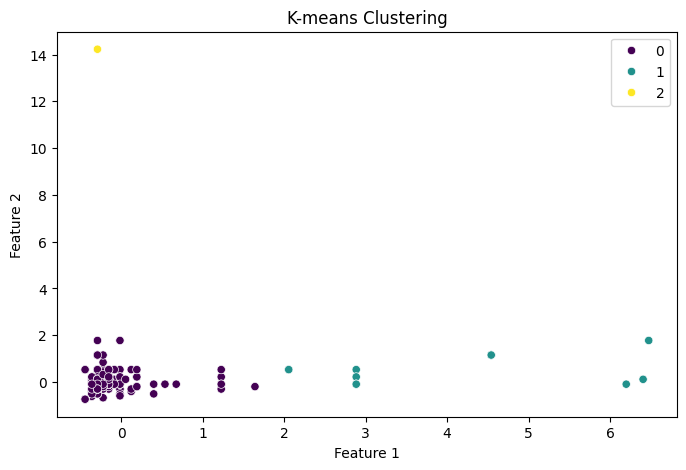


Hierarchical Clustering:


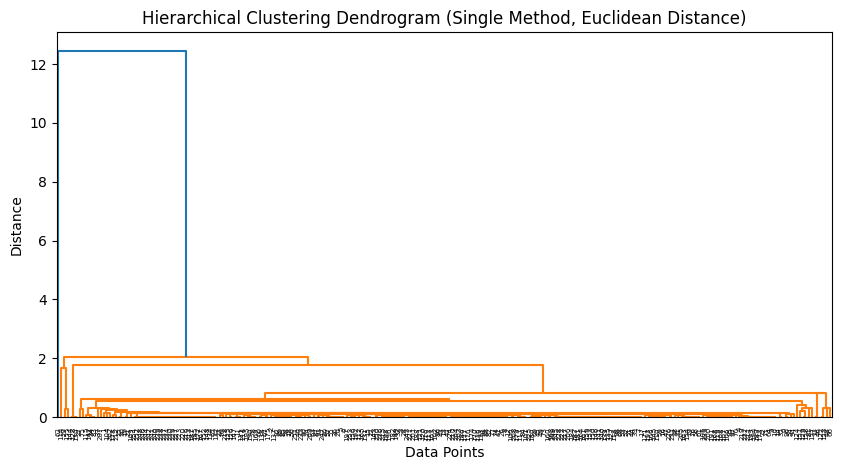

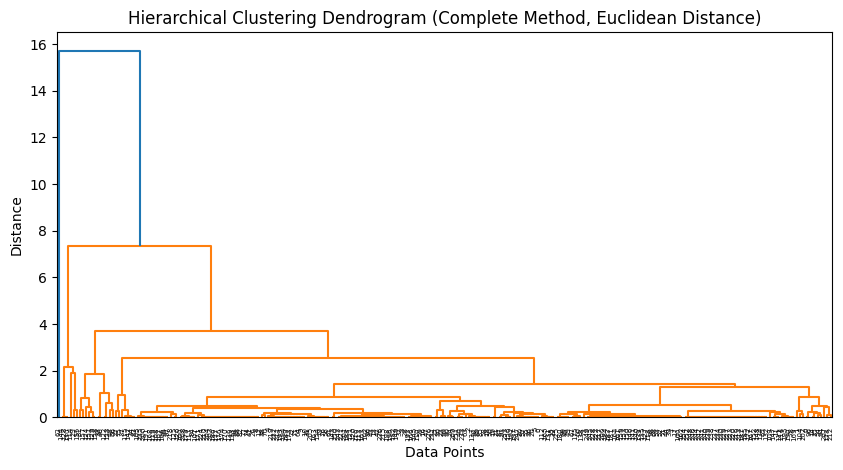

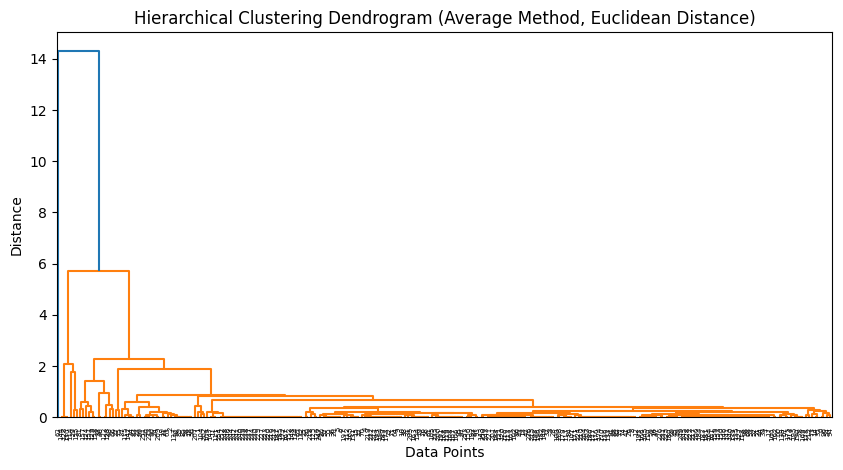

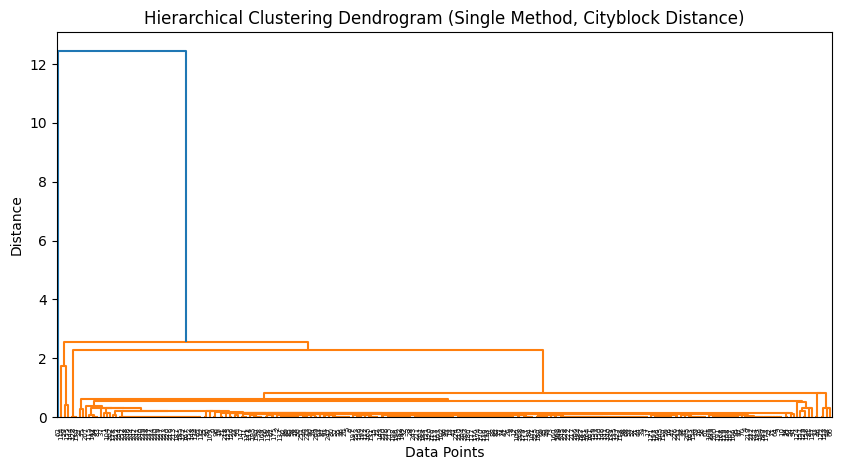

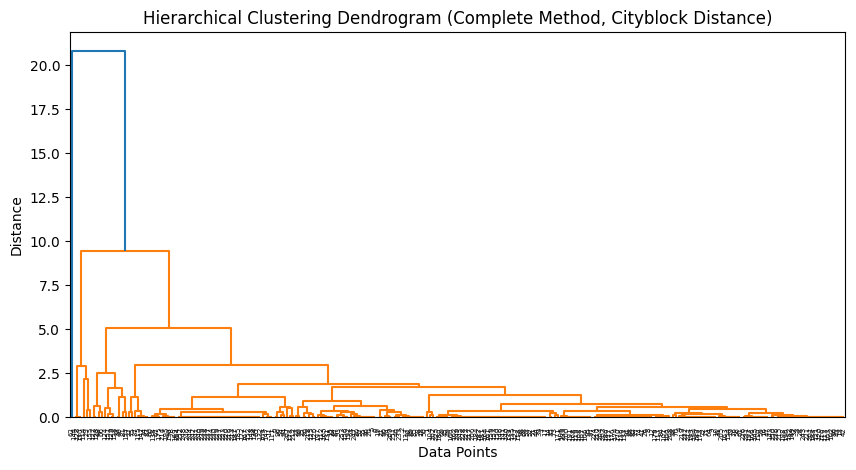

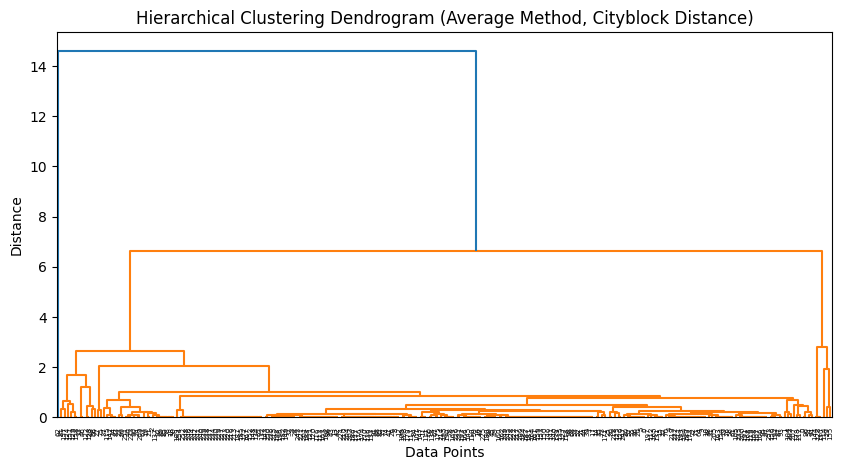

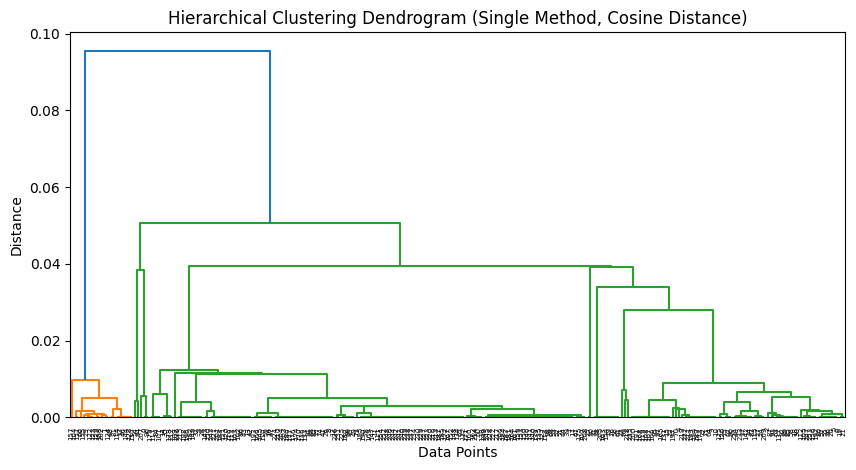

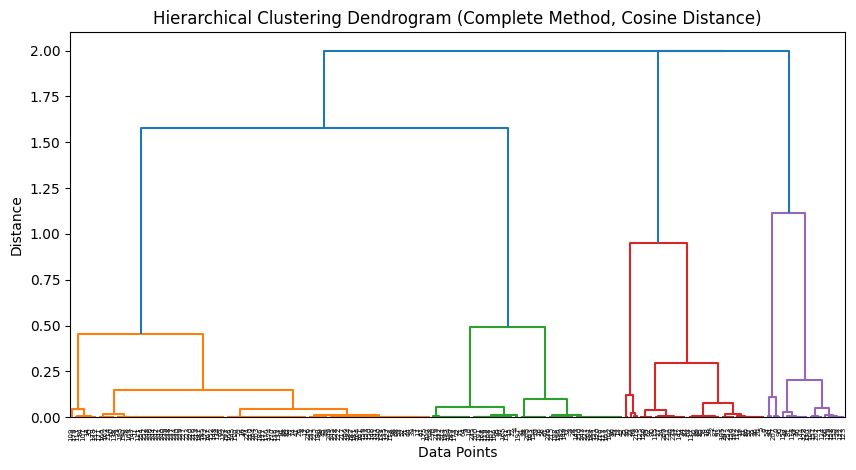

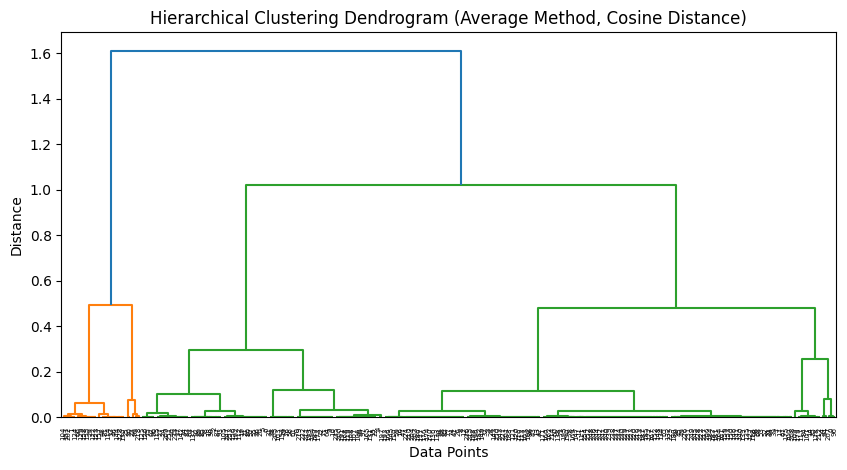


Principal Component Analysis (PCA):
Explained Variance Ratio: [0.57205663 0.42794337]


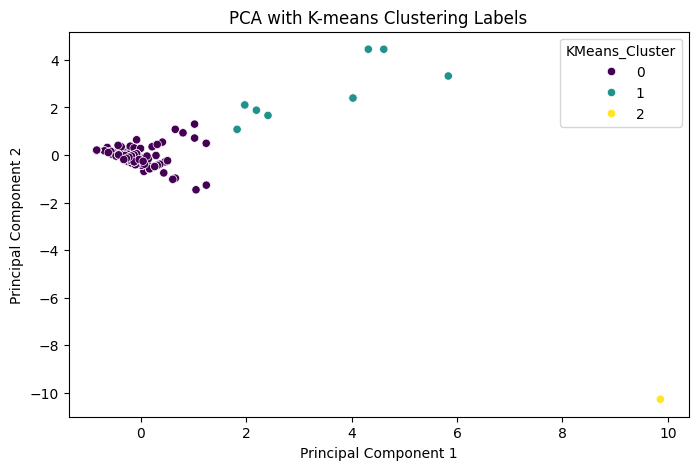

In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the file
uploaded = files.upload()

# Assuming the uploaded file is named "indian_food (2).csv"
data = pd.read_csv("indian_food (2).csv")

# Display the first few rows
print("Dataset Preview:")
print(data.head())

# Display the first few rows to understand the structure
print("Dataset Preview:")
print(data.head())

# Preprocessing: Dropping any non-numeric columns for clustering and PCA
numeric_data = data.select_dtypes(include=['float64', 'int64']).dropna()

# Standardizing the data for clustering and PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# K-means Clustering
print("\nK-means Clustering:")
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled_data)
data['KMeans_Cluster'] = kmeans.labels_

# Plot K-means Clustering results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=kmeans.labels_, palette="viridis")
plt.title("K-means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Hierarchical Clustering with different distance measures
print("\nHierarchical Clustering:")
distance_measures = ['euclidean', 'cityblock', 'cosine']

from scipy.spatial.distance import pdist

distance_measures = ['euclidean', 'cityblock', 'cosine']
methods = ['single', 'complete', 'average']  # methods compatible with `metric`

for measure in distance_measures:
    for method in methods:
        distance_matrix = pdist(scaled_data, metric=measure)
        linkage_matrix = linkage(distance_matrix, method=method)
        plt.figure(figsize=(10, 5))
        dendrogram(linkage_matrix)
        plt.title(f"Hierarchical Clustering Dendrogram ({method.capitalize()} Method, {measure.capitalize()} Distance)")
        plt.xlabel("Data Points")
        plt.ylabel("Distance")
        plt.show()


# Principal Component Analysis (PCA)
print("\nPrincipal Component Analysis (PCA):")
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Plotting the PCA results
plt.figure(figsize=(8, 5))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['KMeans_Cluster'], palette="viridis")
plt.title("PCA with K-means Clustering Labels")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()
